### Netflix Movies and TV Shows Clustering

#### The goal is to use unsupervised machine learning techniques to identify similar content groups

In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Load the data from CSV to Dataset

In [3]:
#Read the data 
df = pd.read_csv("D:/Data Science/data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

##### Verify the Top 5 Records information

In [5]:
#Know the top 5 records of information from the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##### Verify the last 5 records of the information

In [7]:
# Know the last 5 records information from the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


##### Identify the Number of Rows and column information from the given dataset

In [9]:
#Know the rows and columns information from the dataset
print(df.shape)
print("No of Rows :",df.shape[0])
print("No of Columns :",df.shape[1])

(7787, 12)
No of Rows : 7787
No of Columns : 12


##### Identify the Column information & datatypes 

In [11]:
#Explore more about the dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Identify the duplication 
##### If we have similar kind of records in our dataset that is called as duplicate records and it is impact when performing the Machine learning 

In [13]:
# Identify the duplicates
print("No of Duplicates :",df.duplicated().sum())

No of Duplicates : 0


##### As per the above output we don't have any duplicate records in our data set

#### Identify the null values
##### The null or missing values another one cause of machine learning, in the preprocessing scenario we are verifying the null value records from the dataset

In [15]:
print("No of Null Columns :",df.isnull().any().sum())

No of Null Columns : 5


##### We have 5 no of null columns in our record,need to explore more about this

In [17]:
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


##### We have the director,cast,country,date_added and rating columns having the null values 
##### Based on the value calculate the percentage and plot the chart

In [19]:
#Calculate the null information percentage 
null_df = pd.DataFrame({'Columns':df.columns,'No_of_null_values':df.isnull().sum(),'Percentage':round(df.isnull().sum()/len(df)*100,2)})

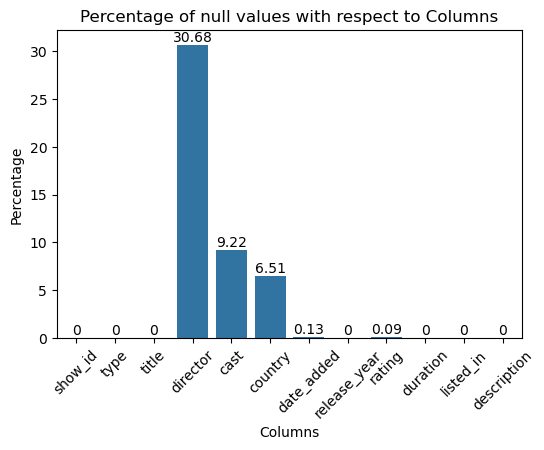

In [21]:
#Plot the chart
plt.figure(figsize=(6,4))
ax=sns.barplot(x='Columns', y='Percentage', data=null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Columns')
plt.xticks(rotation= 45)
plt.show()

##### As per the above plot we can see the director,cast and country columns have more null values and date_added and rating has less null values

#### Handling Null values
##### The director,cast country have huge nulls and we apply the empty records in the field and date_added and rating columns remove the null values from df.

In [23]:
# Filling null values of features director, cast and country
df.director.fillna(" ",inplace=True)
df.cast.fillna(" ",inplace=True)
df.country.fillna(" ",inplace=True)
# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

In [25]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##### Removed all the null values and it is good for the next process

#### Handling Outliers

<Axes: >

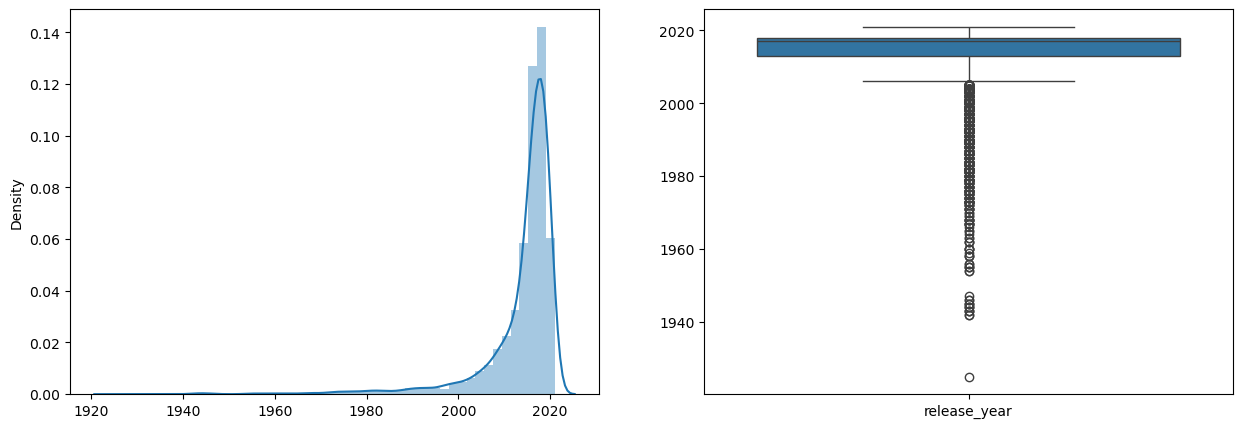

In [27]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))
# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])

##### Except for the release year, almost all of the data are presented in text format.
##### The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers

##### Convert Categorial column to numerical column using One-Hot Encoder
##### We are using the Label encoder and MultilabelBinarizer becasuse we have the list_in has the comma separated values

##### Converting 'date_added' to datetime for the feature extract

In [33]:
#Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')

##### errors='coerce' handle the unconvertable variable 

##### Add the new column 'Content_age'

In [36]:
df['content_age'] = 2025-df['release_year']

##### Check numerical and categorical columns 

In [39]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
content_age              int64
dtype: object


##### Encode using the Label Encoding

In [42]:
#Import the required libaries
from sklearn.preprocessing import  LabelEncoder

In [44]:
#Encoding the data
lbl_encoder = LabelEncoder()
df['type_encoded'] = lbl_encoder.fit_transform(df['type'])
df['rating_encoded'] = lbl_encoder.fit_transform(df['rating'].astype(str))

##### Count number of genres

In [47]:
df['genre_count'] = df['listed_in'].apply(lambda x: len(str(x).split(',')))

##### Select the feature columns for clustering 

In [50]:
features = df[['type_encoded','rating_encoded','content_age','genre_count']]

##### Standardize the numerical feature using StandardScalar

In [64]:
#Import important libraries
from sklearn.preprocessing import StandardScaler
#Standard Scalar
scalar = StandardScaler()
features_scaled = scalar.fit_transform(features)

#### K-Means

##### Initialize the K-Means Cluster

In [88]:
#Import Important Libraries
from sklearn.cluster import KMeans
# Find optimal k using Elbow method
inertia = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=5)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

##### Based on the Cluster Execution define the Plot

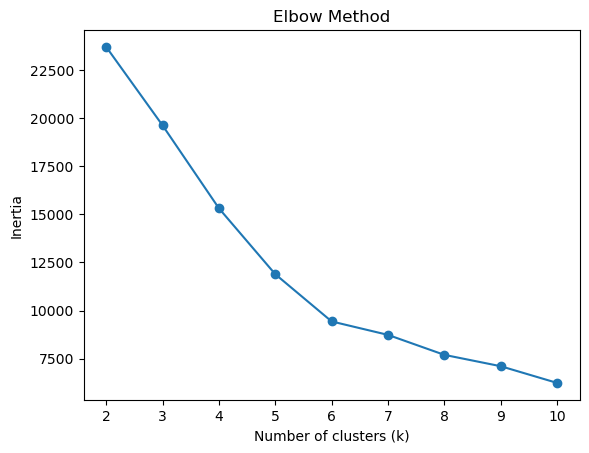

In [91]:
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Comments -> 
##### 1. From k =1 to k=6, we can see a sharp decrease in distortion.
##### 2. Beyond k=6, we do not see any significant reduction in the value of distortion as we increase WCSS
##### 3. From k=4, k=5 also, there is no significant reduction but we can ignore that 

##### From the above number of analysis we can confirm the k=6 is the optimal number of cluster

In [99]:
#Import important libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Fit K-Means with chosen k (e.g., k=6)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(features_scaled)
df['cluster_kmeans'] = labels_kmeans

# Evaluation Metrics
print("Silhouette Score:", silhouette_score(features_scaled, labels_kmeans))
print("Davies-Bouldin Index:", davies_bouldin_score(features_scaled, labels_kmeans))

Silhouette Score: 0.368889338923448
Davies-Bouldin Index: 0.9697792987387411


##### Silhouette Cluster value is greater than 0, it means well separated cluster
##### Davies-Bouldin index is less than 1 and it is represent the Cluster separation

#### Hierarchical Clustering

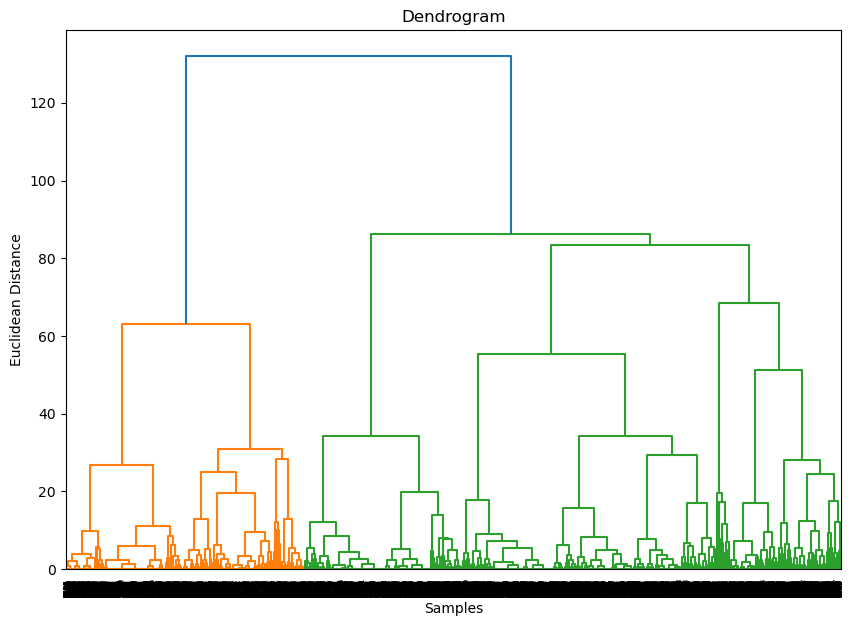

Silhouette Score: 0.3506722166836935
Davies-Bouldin Index: 1.0848907070305593


In [105]:
#Import important libraries
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import  AgglomerativeClustering

# Dendrogram
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Agglomerative Clustering with chosen k (e.g., k=6)
hier = AgglomerativeClustering(n_clusters=6)
labels_hier = hier.fit_predict(features_scaled)
df['cluster_hierarchical'] = labels_hier

print("Silhouette Score:", silhouette_score(features_scaled, labels_hier))
print("Davies-Bouldin Index:", davies_bouldin_score(features_scaled, labels_hier))


##### Silhouette Cluster value is greater than 0, it means well separated cluster
##### Davies-Bouldin index is greater than 1 and it is represent the Cluster has overlap

#### DBSCAN 

In [110]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(features_scaled)
df['cluster_dbscan'] = labels_dbscan

print("Silhouette Score :", silhouette_score(features_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")
print("Davies-Bouldin Index :", davies_bouldin_score(features_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")

Silhouette Score : 0.339637527624006
Davies-Bouldin Index : 1.1146517079637008


##### Silhouette Cluster value is greater than 0, it means well separated cluster
##### Davies-Bouldin index is greater than 1 and it is represent the Cluster has overlap

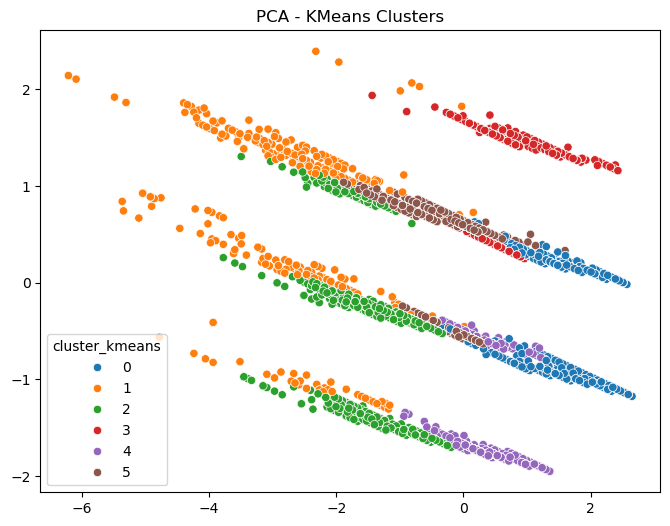

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(features_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['cluster_kmeans'], palette='tab10')
plt.title('PCA - KMeans Clusters')
plt.show()

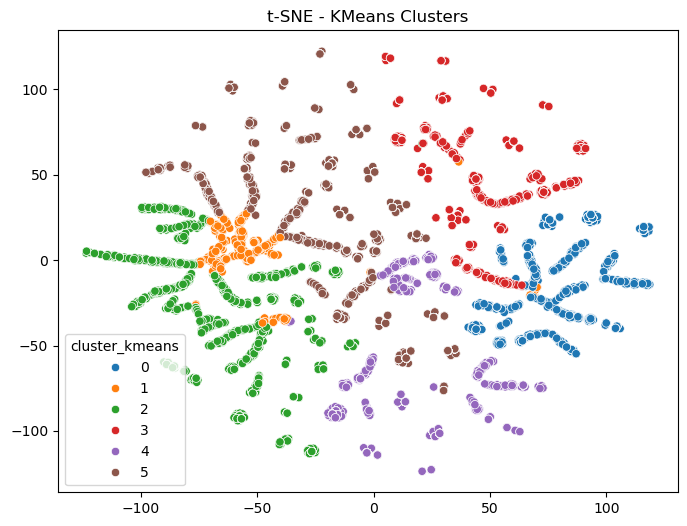

In [82]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['cluster_kmeans'], palette='tab10')
plt.title('t-SNE - KMeans Clusters')
plt.show()

In [84]:
dbi = davies_bouldin_score(features_scaled, labels_kmeans)
print(f'Davies-Bouldin Index (K-Means, k=6): {dbi:.3f}')

Davies-Bouldin Index (K-Means, k=6): 0.970


#### Based on the different cluster approach Silhouette Score, Davies-Bouldin Index, and Inertia to validate cluster effectiveness, The KMeans Cluster provide the Good evaluation